# CBU5201 mini-project submission

The mini-project has two separate components:


1.   **Basic component** [6 marks]: Using the genki4k dataset, build a machine learning pipeline that takes as an input an image and predicts 1) whether the person in the image is similing or not 2) estimate the 3D head pose labels in the image.
2.   **Advanced component** [10 marks]: Formulate your own machine learning problem and build a machine learning solution using the genki4k dataset (https://inc.ucsd.edu/mplab/398/). 

Your submission will consist of two Jupyter notebooks, one for the basic component and another one for advanced component. Please **name each notebook**:

* CBU5201_miniproject_basic.ipynb
* CBU5201_miniproject_advanced.ipynb

then **zip and submit them toghether**.

Each uploaded notebook should include: 

*   **Text cells**, describing concisely each step and results.
*   **Code cells**, implementing each step.
*   **Output cells**, i.e. the output from each code cell.

and **should have the structure** indicated below. Notebooks might not be run, please make sure that the output cells are saved.

How will we evaluate your submission?

*   Conciseness in your writing (10%).
*   Correctness in your methodology (30%).
*   Correctness in your analysis and conclusions (30%).
*   Completeness (10%).
*   Originality (10%).
*   Efforts to try something new (10%).

Suggestion: Why don't you use **GitHub** to manage your project? GitHub can be used as a presentation card that showcases what you have done and gives evidence of your data science skills, knowledge and experience. 

Each notebook should be structured into the following 9 sections:


# 1 Author

**Student Name**:  
**Student ID**:  



# 2 Problem formulation

Describe the machine learning problem that you want to solve and explain what's interesting about it.

1.  input: image
2.  emotion stage: -1(very sad), -0.5(sad), 0.5(happy), 1(very happy)

# 3 Machine Learning pipeline

Describe your ML pipeline. Clearly identify its input and output, any intermediate stages (for instance, transformation -> models), and intermediate data moving from one stage to the next. It's up to you to decide which stages to include in your pipeline. 

# 4 Transformation stage

Describe any transformations, such as feature extraction. Identify input and output. Explain why you have chosen this transformation stage.

# 5 Modelling

Describe the ML model(s) that you will build. Explain why you have chosen them.

# 6 Methodology

Describe how you will train and validate your models, how model performance is assesssed (i.e. accuracy, confusion matrix, etc)

# 7 Dataset

Describe the dataset that you will use to create your models and validate them. If you need to preprocess it, do it here. Include visualisations too. You can visualise raw data samples or extracted features.

# 8 Results

Carry out your experiments here, explain your results.

In [1]:
import os, shutil
import keras
base_dir = 'D:\\desktop\\bupt\\ML\\Mini_Project\\dataset_advanced'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

In [24]:
import tensorflow.keras as keras
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

valid_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 3200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


**Building Model**

In [3]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(1024, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 256)      0

In [4]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=valid_generator,
      validation_steps=400//20)

C:\ProgramData\Anaconda3\envs\tensorflow\Lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
C:\ProgramData\Anaconda3\envs\tensorflow\Lib\site-packages\ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == "":


Epoch 1/10
100/100 [==============================] - 124s 1s/step - loss: 0.6633 - acc: 0.5810 - val_loss: 0.5706 - val_acc: 0.7200
Epoch 2/10
100/100 [==============================] - 133s 1s/step - loss: 0.4815 - acc: 0.7740 - val_loss: 0.4094 - val_acc: 0.8275
Epoch 3/10
100/100 [==============================] - 143s 1s/step - loss: 0.3203 - acc: 0.8730 - val_loss: 0.2734 - val_acc: 0.8875
Epoch 4/10
100/100 [==============================] - 144s 1s/step - loss: 0.2247 - acc: 0.9110 - val_loss: 0.2377 - val_acc: 0.9050
Epoch 5/10
100/100 [==============================] - 143s 1s/step - loss: 0.1869 - acc: 0.9325 - val_loss: 0.1850 - val_acc: 0.9350
Epoch 6/10
100/100 [==============================] - 143s 1s/step - loss: 0.1562 - acc: 0.9430 - val_loss: 0.1787 - val_acc: 0.9350
Epoch 7/10
100/100 [==============================] - 142s 1s/step - loss: 0.1262 - acc: 0.9530 - val_loss: 0.1907 - val_acc: 0.9225
Epoch 8/10
100/100 [==============================] - 141s 1s/step - 

In [5]:
model.save('D:\\desktop\\bupt\\ML\\Mini_Project\\advanced.h5')

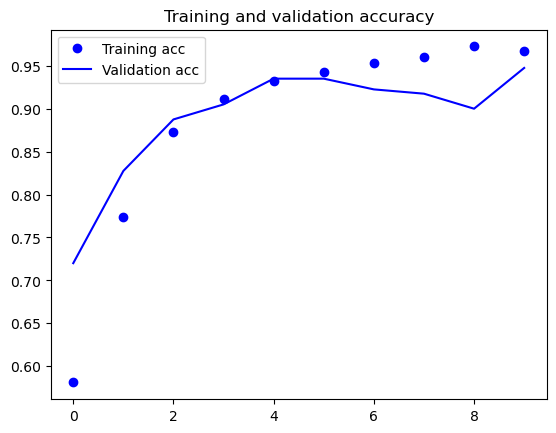

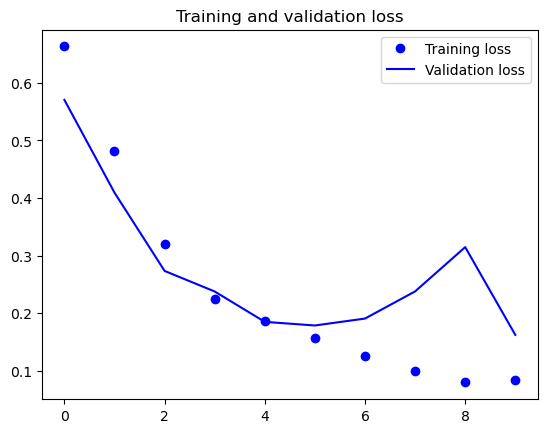

In [6]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [21]:
import tensorflow.keras as keras
import numpy as np
model = keras.models.load_model('D:\\desktop\\bupt\\ML\\Mini_Project\\advanced.h5')
#Male case
img_path='D:\\desktop\\bupt\\ML\\Mini_Project\\dataset_advanced\\test\\A\\file0042.jpg'
img = keras.utils.load_img(img_path, target_size=(150, 150))
img_tensor = keras.utils.img_to_array(img)/255.0
img_tensor = np.expand_dims(img_tensor, axis=0)
prediction =model.predict(img_tensor)  
print(prediction)
if prediction[0][0]>0.5:
    result='Female'
else:
    result='Male'
print(result)
#Female case
img_path='D:\\desktop\\bupt\\ML\\Mini_Project\\dataset_advanced\\test\\B\\file0091.jpg'
img = keras.utils.load_img(img_path, target_size=(150, 150))
img_tensor = keras.utils.img_to_array(img)/255.0
img_tensor = np.expand_dims(img_tensor, axis=0)
prediction =model.predict(img_tensor)  
print(prediction)
if prediction[0][0]>0.5:
    result='Female'
else:
    result='Male'
print(result)

1/1 [==============================] - 0s 92ms/step
[[0.00027258]]
Male
1/1 [==============================] - 0s 45ms/step
[[0.9999708]]
Female


In [25]:
score = model.evaluate_generator(
  test_generator,
  steps=400//20,
  max_queue_size=10,
  workers=1,
  use_multiprocessing=False,
  verbose=0)
print("loss: %.6f - acc: %.6f" % (score[0], score[1]))

C:\ProgramData\Anaconda3\envs\tensorflow\Lib\site-packages\ipykernel_launcher.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  import sys


loss: 0.229494 - acc: 0.920000


# 9 Conclusions

Your conclusions, improvements, etc should go here